<a href="https://colab.research.google.com/github/JoaoAlmeida/Big-Data-Notebooks/blob/main/1_Datasets_and_KGs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-on Part 1/4: Datasets, knowledge graphs and preprocessing**

---



cover-1.svg

## **Get Started**

Before starting let's prepare our workspace!

The material is uploaded on **Google Drive** and includes the covered 🗂 datasets (Part 1), 🤖 the models (Parts 2 and 3)  and ✨ the evaluation protocols (Part 4). In the [repository](https://github.com/explainablerecsys/recsys2022), you can find all the files **minus the datasets and the pre-trained** due to upload limits of github. 

⭐ Star the repository if you would like to follow updates and the updated versions of the tutorial.


To proceed with our hands-on, **follow these steps**:
- Open the [google drive folder](https://drive.google.com/drive/folders/1r2Mj7gMZn8lhsoXMekqmJuGbzqu9YOoh?usp=sharing) containing the material. 
- On the top, click on *RecSys22-Tutorial* and select **add shortcut to drive**. 
- On the left, go to **My Drive**, look for the *RecSys22-Tutorial* folder, enter on it, then enter on the *Hands-On* folder.
- From there, you can open **this notebook** *1_Datasets_and_KGs* and all the other notebooks. Let's open the current notebook.
- From there, mount your google drive to get started, running the following cell.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now that we have our Google Drive connected, let's move into the tutorial's directory.

In [ ]:
%cd /content/drive/MyDrive/RecSys22-Tutorial/Hands-On

/content/drive/MyDrive/RecSys22-Tutorial/Hands-On


🤘 We are ready to go!

## Outline

---

In this notebook, you will learn about the datasets, their Knowledge Graphs and the standard preprocessing procedures. We will:

1️⃣ Load and visualize three dataset beloning to different domains, namely Movie 📽, Music  📀, and E-Commerce 📦. 

2️⃣ Load their Knowledge Graphs (KGs) extracted respectively from DBpedia, Freebase, and the dataset's metadata.

3️⃣ Perform some preprocessing steps on both dataset and KG.

4️⃣ Save dataset and KG in a **standard format**, that will consent to use our mappers. 

- [ 0 - Packages](#0)
- [ 1 - Prerequisites](#1)
    - [1.1 - Datasets Overview]()
    - [1.2 - Knowledge Graphs]()
- [ 2 - ML1M](#2)
    - [2.1 - Dataset](#2.1)
    - [2.2 - Knowledge Graph](#2.2)
    - [2.3 - Preprocessing dataset](#2.3)
    - [2.4 - Saving dataset to standard format](#2.4)
    - [2.5 - Preprocessing KG](#2.5)
    - [2.6 - Saving KG to standard format](#2.6)
- [ 3 - LFM1M](#3)
    - [3.1 - Dataset](#3.1)
    - [3.2 - Knowledge Graph](#3.2)
    - [3.3 - Preprocessing dataset](#3.3)
    - [3.4 - Saving dataset to standard format](#3.4)
    - [3.5 - Preprocessing KG](#3.5)
    - [3.6 - Saving KG to standard format](#3.6)
- [ 4 - Amazon Cellphones](#4)
    - [4.1 - Dataset](#4.1)
    - [4.2 - Preprocessing dataset](#4.2)
    - [4.3 - Saving dataset to standard format](#4.3)
    - [4.4 - Knowledge Graph](#4.4)
- [ 5 - References](#5)

<a name="0"></a>
## 0 - Packages

---

In this section, we will mainly use the [Pandas](https://pandas.pydata.org/) package to perform visualization, preprocessings, and to save the data.


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

*If you are not familiar with Pandas, don't worry; we will describe each operation done with the library to make this tutorial as much beginner friendly as possible!*

<a name="1"></a>
## 1 - Prerequisites

---


### 1.1 - Dataset Overview

We will use three **publicly available** datasets which vary in domain, extensiveness, and sparsity. 

For scalability purposes, we will use **reduced versions** of some of these datasets. 

All the datasets are located on the `data/` folder

-  📽 **Movie**: MovieLens 1M [(ML1M)](https://grouplens.org/datasets/movielens/1m/) [[1]](#p1) is composed by 1 million user-movie ratings (0-5) from 6000 users on 4000 movies.

-  📀 **Music**: Last.FM 1M (LFM1M) is a **randomly extracted** subset from the huge [Last.FM 1B dataset](http://www.cp.jku.at/datasets/LFM-1b/) [[2]](#p2). It is composed by 1 million user-song positive interactios from 5941 users on 10303 tracks.

- 📦 **E-Commerce**: [Amazon CellPhones](http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz) [[3]](#p3) is one of the [29 collections](https://nijianmo.github.io/amazon/index.html) grouped by category, collected by real user behavior on the Amazon E-commerce platform. It is composed by 1128437 user ratings including textual reviews of 157212 users on 48186 items.

More specific statistics about the dataset are collected in the following table.

This table collects some statistics related to the dataset we are going to cover.

| Domain     	| Dataset Name      	| # of Users 	| # of Items 	| # of Interactions |
|------------	|-------------------	|------------	|------------	|-------------------	
| Movies     	| MovieLens 1M      	|  6040          	|  3883          	|  1000209                 	|
| Music      	| LastFM 1M         	| 5941           	| 10303            	| 1058745                   	|
| E-Commerce 	| Amazon CellPhones 	| 157212          	|   48186         	| 1128437                  	| 

Considering the **files organization** they are structured as follow:

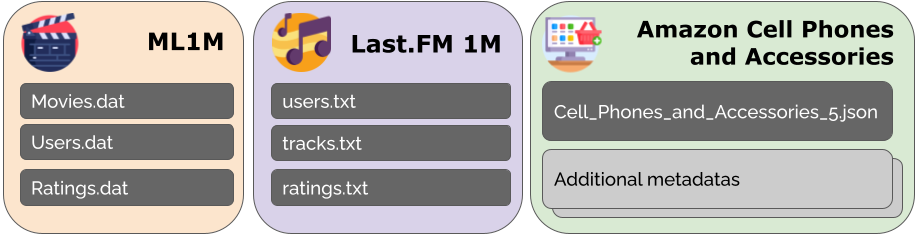

Given the **heterogeous file structures**, we are going to normalize the three datasets in a **standardized format** composed by the essential data needed for the purpose of this tutorial. The standardized files and their structure are depicted in the following image:


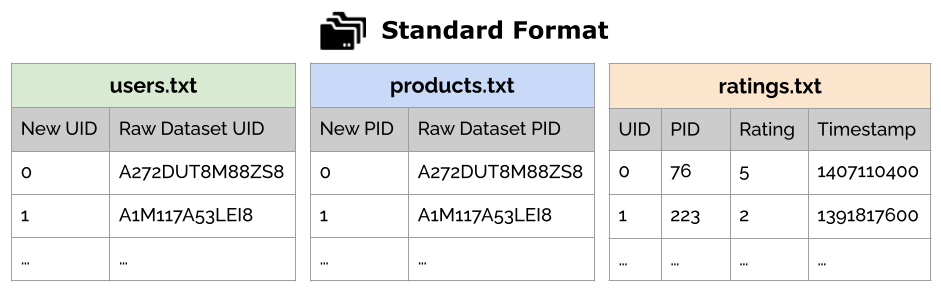

### 1.2 - Knowledge Graphs (KGs)


A **Knowledge Graph (KG)**, also known as a semantic network, represents a network of **real-world entities** — i.e., objects, events, situations, or concepts — and illustrates the **relationship between them**. This information is usually stored in **Knowledge Bases (KB)** (e.g., DBpedia [[4]](#p4), WikiData [[5]](#p5)) and visualized as a graph structure, prompting the term knowledge “graph.”

A knowledge graph is made up of three main components: **nodes, edges, and labels**. Any object, place, or person can be a node. An edge defines the relationship between the nodes. For example, a node could be a movie, like Inception, and an actor, like Tom Hardy. An edge would categorize the relationship as a **starring (active)** relationship between **Inception** and **Tom Hardy** or as **starred_by (passive)** relationship between **Tom Hardy** and **Inception**.

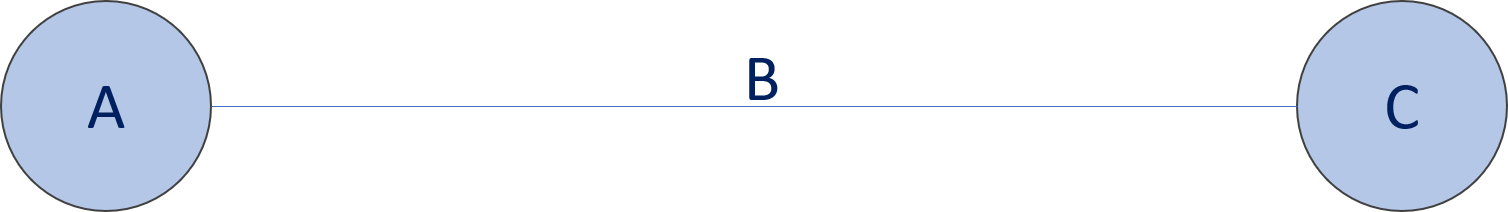

*A* represents the subject (**entity head**), *B* represents the predicate (**relation**), *C* represents the object (**entity tail**).

A KG for recommendations is obtained by firstly linking every **item in the offline dataset with the entity that rapresents the same item in a Knowledge Base**. For example, Inception from MovieLens dataset has a **corresponding entity** entry in DBpedia, and we are able to obtain its attribute information by reading out all its associated **relation triples in KBs.**

This **linkage** is composed by linked ID pairs, which consists of a dataset item ID and a KB entity ID. As example:

                                           25991	m.09pglcq
                                           25993	m.0cjwhb
                                           25994	m.0k443
                                           25995	m.0b7kj8

So we can say that a KG is composed by 4 main components:
- 🔗 **Linkage**: Is the mapping between the dataset ID and KB entity ID
- ⬛ **Set of entities** (nodes): Contains all the unique entities present in the triplets including item entities.
- ➡️ **Set of relations** (edges): Contains all the unique relations present in the triplets.
- ⬛ ➡️ ⬛ **Set of triplets** (the graph itself): Contains all the triplets of the form (entity head, relation, entity tail).

Again, since different KGs are **represented with different structures**,
 we will define a **KG standard format** which can be used to produce mapping for baselines.

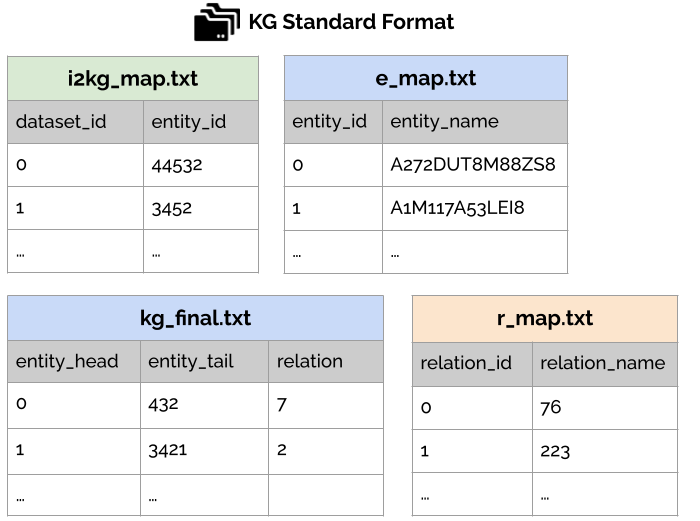

<a name="2"></a>
## 2 - Movielens 1M

---


<a name="2.1"></a>
### 2.1 - Dataset
This dataset is located under `data/ml1m`. This dataset has been directly downloaded from the [GroupLens website](https://grouplens.org/datasets/movielens/1m/).

#### Dataset Description



The dataset is composed by the following files:

- 👥 `data/ml1m/users.dat`: List of users and some demographical data.

- 📽 `data/ml1m/movies.dat`: Products catalog of movies and their metadata.

- ⭐ `data/ml1m/ratings.dat`: List of users' interactions with movies.

The files are composed by rows **separated by ::** that contain crucial and side-information for the recommendation task. 

The rows are structured as follow:

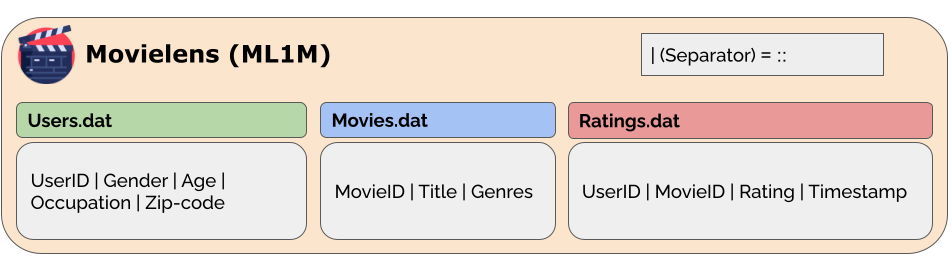

*For more infos about the data format, please refer to the [official readme](https://files.grouplens.org/datasets/movielens/ml-1m-README.txt)*

#### Load and Visualize

Before starting let's save a variable with the path to the `data/ml1m/` in this way we can avoid repeating code.

In [ ]:
ml1m_path = 'data/ml1m'

For this part and the following parts we will mainly rely on [Pandas DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). 

> A Pandas a DataFrame **is a 2-dimensional labeled data structure** with columns of potentially different types. You can think of it **like a spreadsheet or SQL table, or a dict of Series objects**. It is generally the most commonly used pandas object.

Let's start by creating a **new DataFrame** using our  `ml1m/users.dat` data.

We can create a DataFrame **reading directly from a csv** using the `new_dataframe = pd.read_csv(filename, separator, name_of_columns, header)`




In [ ]:
ml1m_users_df = pd.read_csv(f'{ml1m_path}/users.dat', sep="::", names=["UserID","Gender","Age","Occupation","Zip-code"], header=None)
display(ml1m_users_df.head(5))
print(f"Unique Users: {len(ml1m_users_df)}")

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Unique Users: 6040


Let's do now the same thing with the `ml1m/movies.dat` file.

In [ ]:
ml1m_movies_df = pd.read_csv(f'{ml1m_path}/movies.dat', sep="::", names=["movie_id", "movie_name", "genre"], header=None, encoding='latin-1')
display(ml1m_movies_df.head(5))
print(f"Unique Products: {len(ml1m_movies_df)}")

,movie_id,movie_name,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Unique Products: 3883


Finally, let's create another DataFrame using the `ml1m/ratings.dat` data.

In [ ]:
ml1m_ratings_df = pd.read_csv(f'{ml1m_path}/ratings.dat', sep="::", names=["user_id", "movie_id", "rating", "timestamp"], header=None)
display(ml1m_ratings_df.head(5))
print(f"Unique interactions: {len(ml1m_ratings_df)}")

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Unique interactions: 1000209


<a name="2.2"></a>
### 2.2 - Knowledge Graph (KG)
In this section, you will learn the structure of the DBpedia KG.
This KG has been extracted by Cao et al. [[6]](#p6) for their [KTUP model](https://github.com/TaoMiner/joint-kg-recommender). The preprocessed version used from us for our SIGIR22 paper [[13]](#p13) can be found in [our repository](https://github.com/giacoballoccu/explanation-quality-recsys).

#### KG Description

The DBpedia KG is compossed by 4 main files:

- `i2kg_map.tsv`: Mapping between the movielens dataset and the corresponding entity in the KG. 

- `e_map.dat`: Set of entities.

- `r_map.dat`: Set of relations.

- `kg.dat`: Set of triplets *(entity_head, relation, entity_tail)*.

The files internally are structured as follow:


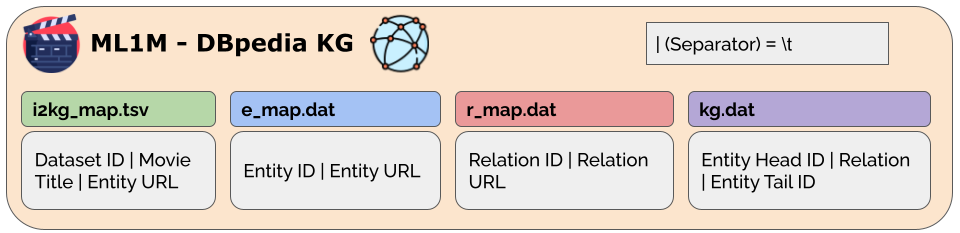

#### DBpedia KG

Let's start by loading the set of entites `data/mlm1/kg/e_map.dat` into a new dataframe. The fields are `["entity_id", "entity_url"]` separated by `\t`

In [ ]:
%cd /content/drive/MyDrive/RecSys22-Tutorial/Hands-On/

/content/drive/MyDrive/RecSys22-Tutorial/Hands-On


In [ ]:
entities_df = pd.read_csv(f'{ml1m_path}/kg/e_map.dat', sep="\t", names=["entity_id", "entity_url"])
entities_df.head(5)

,entity_id,entity_url
0,0,http://dbpedia.org/resource/Roger_Carel
1,1,http://dbpedia.org/resource/Soundtrack_album
2,2,http://dbpedia.org/resource/1982_in_film
3,3,http://dbpedia.org/resource/Category:Films_set...
4,4,http://dbpedia.org/resource/Plaza_Hotel


From the **entity url**, you can access the page of the entity in the DBpedia knowledge base and you can read more about it and what are the relations that it has with other entities.

Let's load the `data/ml1m/kg/12kg_map.tsv` into a new DataFrame, the fields this time are `["dataset_id", "movie_name", "entity_url"]`, again separated by `\t`

In [ ]:
movies_to_kg_df = pd.read_csv(f'{ml1m_path}/kg/i2kg_map.tsv', sep="\t", names=["dataset_id", "movie_name", "entity_url"])

In [ ]:
display(movies_to_kg_df.head(5))
print(f"Items mapped in the KG: {movies_to_kg_df.shape[0]}")

,dataset_id,movie_name,entity_url
0,781,Stealing Beauty (1996),http://dbpedia.org/resource/Stealing_Beauty
1,1799,Suicide Kings (1997),http://dbpedia.org/resource/Suicide_Kings
2,521,Romeo Is Bleeding (1993),http://dbpedia.org/resource/Romeo_Is_Bleeding
3,3596,Screwed (2000),http://dbpedia.org/resource/Screwed_(2000_film)
4,3682,Magnum Force (1973),http://dbpedia.org/resource/Magnum_Force


Items mapped in the KG: 3301


Let's load the `data/ml1m/kg/kg.dat` file, which contains the triplets (entity head, entity tail, relation). This file has already an header so we don't need to manually specify it.

In [ ]:
kg_df = pd.read_csv(f'{ml1m_path}/kg/kg.dat', sep="\t")
display(kg_df.head(5))
print(f"Number of triplets: {kg_df.shape[0]}")

,entity_head,entity_tail,relation
0,9386,4955,12
1,6851,1770,1
2,210,5210,8
3,4205,406,12
4,11533,12345,3


Number of triplets: 434189


Finally, let's load the `data/ml1m/kg/r_map.dat` which contains the available relations of the KG. The fields are `["relation_id", "relation_url"]`, separated by `\t`.

In [ ]:
relations_df = pd.read_csv(f'{ml1m_path}/kg/r_map.dat', sep="\t", names=["relation_id", "relation_url"])
relations_df

,relation_id,relation_url
0,0,http://dbpedia.org/ontology/cinematography
1,1,http://dbpedia.org/property/productionCompanies
2,2,http://dbpedia.org/property/composer
3,3,http://purl.org/dc/terms/subject
4,4,http://dbpedia.org/ontology/openingFilm
5,5,http://www.w3.org/2000/01/rdf-schema#seeAlso
6,6,http://dbpedia.org/property/story
7,7,http://dbpedia.org/ontology/series
8,8,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
9,9,http://dbpedia.org/ontology/basedOn


<a name="2.3"></a>
### 2.3 - Preprocessing Dataset

#### Missing items in KG

A common problem when dealing with datasets augmented with knowledge graphs (KGs) is related to **missing links** between the **product in the dataset** and the **entities that represent that product in the KG**.  

These KGs are extracted querying for **a product (in the dataset)** and finding the  **entity that represent the same product (in the KG)**.

Sometimes, **this linking process fails** and we end up having some products **not mapped** with the KG. Consequently, we have no side information about that item. Let's check if it's our case.

In [ ]:
print(f"Items in the original dataset: {ml1m_movies_df.shape[0]}")
print(f"Items correctly mapped in the KG: {movies_to_kg_df.shape[0]}")

Items in the original dataset: 3883
Items correctly mapped in the KG: 3301


Unfortunately, our KG has **some missing items** compared to our dataset 😔

As you can see from `item_to_kg_map` number of rows, this file contains **3301 unique movies**, which is less than the **3883 unique movies** originally present in the dataset `ml1m_movies_df`. 

As  a workaround, what is usually done [[6,7,8]](#p6) is to **remove the products not matched** in the KG and **the ratings associated** to that item. Let's remove from the `ml1m_movies_df` DataFrame the movies that are not in `item_to_kg_map`.


To do that, we will use the [DataFrame.isin(values)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html) method to obtain a [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) of boolean values that tells if the value is in the DataFrame. 

    ml1m_movies_df['movie_id'].isin(item_to_kg_map.dataset_id)

From that, using the [slicing](https://pandas.pydata.org/docs/user_guide/indexing.html), we can remove the rows where the `isin` has returned False, as follows:

    ml1m_movies_df = ml1m_movies_df[ml1m_movies_df['movie_id'].isin(item_to_kg_map.dataset_id)]

Finally, we use [reset_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to keep our index incrementally and our DataFrame nice and clean.

In [ ]:
number_of_movies = ml1m_movies_df.shape[0]
ml1m_movies_df = ml1m_movies_df[ml1m_movies_df['movie_id'].isin(movies_to_kg_df.dataset_id)]
ml1m_movies_df.reset_index()
display(ml1m_movies_df.head(5))
print(f"Number of rows removed due to missing links with KG: {number_of_movies - ml1m_movies_df.shape[0]}")

,movie_id,movie_name,genre
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


Number of rows removed due to missing links with KG: 582


Also, we need to remove the items that are not present in the entities list `entities_df`. We can easily do it by merging the `movies_to_kg_df` and `entities_df` in a **joint DataFrame**. The items that **cannot be joined will be automatically discared**.

We can do that by using [Pandas.merge(dataframe1, dataframe2, on)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html). 

*Note: This function behaves exactly like a join in SQL, the `dataframe1` is the first table, the `dataframe2` is the second, and the `on` defines the key on where to perfom the join.*

In [ ]:
movies_to_kg_df = pd.merge(movies_to_kg_df, entities_df, on=["entity_url"])
display(movies_to_kg_df.head(5))
print(f"Correctly mapped items: {movies_to_kg_df.shape[0]}")

,dataset_id,movie_name,entity_url,entity_id
0,781,Stealing Beauty (1996),http://dbpedia.org/resource/Stealing_Beauty,5474
1,1799,Suicide Kings (1997),http://dbpedia.org/resource/Suicide_Kings,9337
2,521,Romeo Is Bleeding (1993),http://dbpedia.org/resource/Romeo_Is_Bleeding,8520
3,3596,Screwed (2000),http://dbpedia.org/resource/Screwed_(2000_film),4713
4,3682,Magnum Force (1973),http://dbpedia.org/resource/Magnum_Force,14676


Correctly mapped items: 3266


In [ ]:
print(f"Movies before: {ml1m_movies_df.shape[0]}")
movies_to_kg_df = movies_to_kg_df[movies_to_kg_df.entity_id.isin(entities_df.entity_id)]
print(f"Number of rows removed due to missing entity data in KG: {movies_to_kg_df.shape[0]}")

Movies before: 3301
Number of rows removed due to missing entity data in KG: 3266


Since we have removed the movies from the `ml1m_movies_df`, we need to **propagate** this change also in the `ml1m_ratings_df`. 

Let's do that by using the same code as before, but changing the DataFrame and fields accordingly.

In [ ]:
number_of_ratings = ml1m_ratings_df.shape[0]
ml1m_ratings_df = ml1m_ratings_df[ml1m_ratings_df['movie_id'].isin(movies_to_kg_df.dataset_id)]
ml1m_ratings_df.reset_index()
display(ml1m_ratings_df.head(5))
print(f"Number of rows removed due to interaction with removed movie: {number_of_ratings - ml1m_ratings_df.shape[0]}")

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Number of rows removed due to interaction with removed movie: 58904


✅ We are done! Let's see another preprocessing

#### Reducing a dataset to its k-core (Threshold Discarding)

Another useful preprocessing tecniques is represented by **reducing the dataset to its k-core** [[3]](#p3). This technique is used when dealing with datasets which are **very sparse** or have a very **few number of ratings per user**. 

This is done by fixing a **threshold** *k* and by discarding the items and/or users that occour less than *k* times in the ratings.

To do that, let's firstly create a [pandas Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) with the same number of rows of `ml1m_ratings_df`, where every **row contains the number of occurences** of the userID. To do that, we will use a combination of [DataFrame.groupby()]() and [DataFrame.transform()](), as follows:

    counts_col_user = ml1m_ratings_df.groupby("user_id")["user_id"].transform(len)

We can do the same with the movies, by doing:

    counts_col_movies = ml1m_ratings_df.groupby("movie_id")["movie_id"].transform(len)


In [ ]:
counts_col_user = ml1m_ratings_df.groupby("user_id")["user_id"].transform(len)
counts_col_movies = ml1m_ratings_df.groupby("movie_id")["movie_id"].transform(len)
counts_col_user.head(5)

0    48
1    48
2    48
3    48
4    48
Name: user_id, dtype: int64

From these two **Series**, we can now create a mask of booleans based on the **chosen threshold**. 

In our case, we want to **discard** the **users** that** have less than 5 interactions** and we **don't want to remove more items** since the previous preprocessing has already reduced the size of our catalog.

In [ ]:
k_user, k_movie = 5, 5
mask_user = counts_col_user >= k_user
mask_movies = counts_col_movies >= k_movie
mask_user.head(5)

0    True
1    True
2    True
3    True
4    True
Name: user_id, dtype: bool

Finally, we can apply the mask on `ml1m_ratings_df`, to remove the ratings that involve users that occur less that `k_user` times or movies that occur less than `k_movie` times.

In [ ]:
print(f"Number of ratings before: {ml1m_ratings_df.shape[0]}")
ml1m_ratings_df = ml1m_ratings_df[mask_user & mask_movies]
print(f"Number of ratings after: {ml1m_ratings_df.shape[0]}")
ml1m_ratings_df.head(5)

Number of ratings before: 941305
Number of ratings after: 940963


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


We need to propagate these changes on `ml1m_users_df` and `ml1m_movies_df`. Let's remove the users and movies that aren't anymore in our `ml1m_ratings_df`

In [ ]:
print(f"Number of users before threshold discarding (k={k_user}): {ml1m_users_df.shape[0]}")
ml1m_users_df = ml1m_users_df[ml1m_users_df.UserID.isin(ml1m_ratings_df.user_id.unique())]
print(f"Number of users after threshold discarding (k={k_user}): {ml1m_users_df.shape[0]}")

Number of users before threshold discarding (k=5): 6040
Number of users after threshold discarding (k=5): 6040


In this case, **no user has been removed**, so the dataset in dense enough for our goal. 

In [ ]:
print(f"Number of items before threshold discarding (k={k_movie}): {ml1m_movies_df.shape[0]}")
ml1m_movies_df = ml1m_movies_df[ml1m_movies_df.movie_id.isin(ml1m_ratings_df.movie_id.unique())]
print(f"Number of items after threshold discarding (k={k_movie}): {ml1m_movies_df.shape[0]}")

Number of items before threshold discarding (k=5): 3301
Number of items after threshold discarding (k=5): 3030


We have removed some items! **Remember that every change done to the items in the dataset will also affect the KG**; you need to propagate the change by removing the items from `entities_df`, `movies_to_kg_df` and `kg_df` accordingly.

To do this, we will use the `propagate_item_removal_to_kg` function from our `knowledge_graph_utils` module. 

⏱️ Approximately: 1.3 minutes.

In [ ]:
from knowledge_graph_utils import propagate_item_removal_to_kg
movies_to_kg_df, entities_df, kg_df = propagate_item_removal_to_kg(ml1m_movies_df, movies_to_kg_df, entities_df, kg_df)

Removed 236 entries from i2kg map.
Removed 236 entries from e_map
Removed 11916 triplets from kg_df


✅ We are done! Let's save our proprocessed dataset in the Standard Format!

<a name="2.4"></a>
### 2.4 - Saving preprocessed dataset in Standard Format

Recall, from Section 1.1, that we want **all the datasets** to be formatted **in the same structure**. 

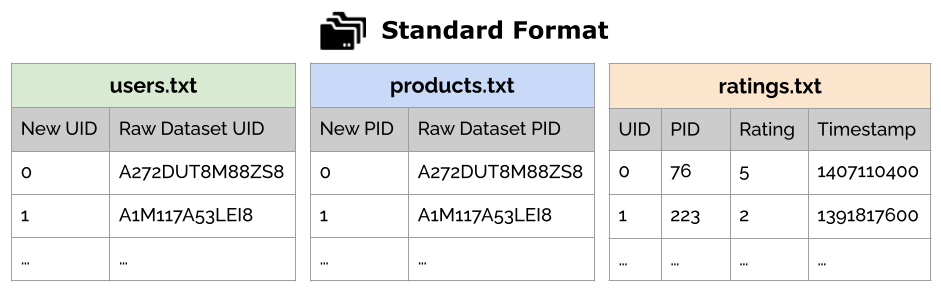

This is crucial to use **our mappers (Part 2)** and **convert the datasets** to a version **readable by different models**.

Let's **save** our preprocessed dataset in the **standard format** into `data/ml1m/preprocessed`.

In [ ]:
ml1m_preprocessed_path = 'data/ml1m/preprocessed'

#### Users file

As first thing, we need to **remove** the columns that carry **addtional data** that **we not need** for now. In our case, we drop the Gender, Age, Occupation, and Zip-Code columns.

Using the `DataFrame.drop(values, axis)`, we can remove the columns that are not of interest. We need to specify the list of values, which are the columns that we want to drop, in our case `["Gender", "Age", "Occupation", "Zip-code"]` and the `axis=1` since we want to drop columns.

In [ ]:
ml1m_users_df = ml1m_users_df.drop(["Gender", "Age", "Occupation", "Zip-code"], axis=1)
ml1m_users_df.head(5)

,UserID
0,1
1,2
2,3
3,4
4,5


Now, following the **Standard Format**, we need to add a new column `new_id` that has an incremental values from `[0, ..., n_users]`.

Let's do that by using the `DataFrame.insert(position, column_name, values)` method. 

In our case, we need to add at position `0`, a column called `new_id`, that has values from `[0, ..., n_users]`. The code snippet is the following:


In [ ]:
ml1m_users_df.insert(0, 'new_id', range(ml1m_users_df.shape[0])) #Create a new incremental ID
ml1m_users_df.head(5)

,new_id,UserID
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


The DataFrame is now exacly in the **standardized format** we wanted. Let's save it by using the `DataFrame.to_csv(filename, header, index, sep, mode)`. Let's save it in `ml1m/preprocessed/users.txt`, the headers are `["new_id", "raw_dataset_id"]`, for the index we specify `False` since we already added the `new_id` manually, as separator `\t` and as mode `w+`.

In [ ]:
ml1m_users_df.to_csv(f'{ml1m_preprocessed_path}/users.txt', header=["new_id", "raw_dataset_id"], index=False, sep='\t', mode='w+')

To have this mapping between the `raw_dataset_id` and `new_id` available in memory, let's store into into a [Python Dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).

In [ ]:
user_id2new_id = dict(zip(ml1m_users_df["UserID"], ml1m_users_df.new_id))

✅ Now, we have our preprocessed and standardized `users.txt` file.

#### Movies file

We do the same for the `products.txt` file, using the `ml1m_movies_df` DataFrame.


In [ ]:
#Drop attributes
ml1m_movies_df = ml1m_movies_df.drop(["movie_name", "genre"], axis=1)
#Add new_id column
ml1m_movies_df.insert(0, 'new_id', range(ml1m_movies_df.shape[0])) #Create a new incremental ID
#Print
display(ml1m_movies_df.head(5))
print(ml1m_movies_df.shape[0])
#Save
ml1m_movies_df.to_csv(f'{ml1m_preprocessed_path}/products.txt', header=["new_id", "raw_dataset_id"], index=False, sep='\t', mode='w+')

,new_id,movie_id
1,0,2
2,1,3
3,2,4
4,3,5
5,4,6


3030


Similarly to what we have done with users, to have the mapping between the `raw_dataset_id` and `new_id` available in memory, let's store into into a [Python Dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).

In [ ]:
movie_id2new_id = dict(zip(ml1m_movies_df["movie_id"], ml1m_movies_df.new_id))

#### Ratings

Before saving the ratings, we want to **convert** the `user_id` and `movie_id` of every rating with the `new_id` that we have assigned to them. To do that we will use the [Series.map(dictionary)](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html).

In [ ]:
ml1m_ratings_df["user_id"] = ml1m_ratings_df['user_id'].map(user_id2new_id)
ml1m_ratings_df["movie_id"] = ml1m_ratings_df['movie_id'].map(movie_id2new_id)
ml1m_ratings_df.head(5)

,user_id,movie_id,rating,timestamp
0,0,872,5,978300760
1,0,537,3,978302109
2,0,679,3,978301968
3,0,2606,4,978300275
4,0,1790,5,978824291


In [ ]:
#Save ratings
ml1m_ratings_df.to_csv(f'{ml1m_preprocessed_path}/ratings.txt', header=["uid", "pid", "rating", "timestamp"], index=False, sep='\t', mode='w+')

<a name="2.5"></a>
### 2.5 - Preprocessing the KG

#### Cleaning wrong formated triplets

Among the triplets, we are only interested in those that involve a **relation between** a entity head (**product**) and an entity tail that is an **external entity**. The triplets may contain relations that involve **product to product** or **entity to entity relations**. We want to **discard them**, since they may create **problems in defining meta-paths** for our algorithms (we will see more about it later).

In this preprocessing, we will get rid of them. 😎

Recall that we previosuly merged the `m1lm_movies_df` with the `entities_df` dataframe. We will use this unified dataframe in this step.

In [ ]:
display(movies_to_kg_df.head(5))
print(f"Number of movies correctly mapped: {movies_to_kg_df.shape[0]}")

,dataset_id,movie_name,entity_url,entity_id
0,781,Stealing Beauty (1996),http://dbpedia.org/resource/Stealing_Beauty,5474
1,1799,Suicide Kings (1997),http://dbpedia.org/resource/Suicide_Kings,9337
2,521,Romeo Is Bleeding (1993),http://dbpedia.org/resource/Romeo_Is_Bleeding,8520
3,3596,Screwed (2000),http://dbpedia.org/resource/Screwed_(2000_film),4713
4,3682,Magnum Force (1973),http://dbpedia.org/resource/Magnum_Force,14676


Number of movies correctly mapped: 3030


Now we can keep in `kg_df` only the rows that respect these two conditions:
- The entity head **must be** a movie (so in `movies_to_kg_df`)
- The entity tail **must not be** a movie (so not in `movies_to_kg_df`)

*Note: To write this condition, we need to use the pandas & **(and)** and ~ **(not)**.*

Firstly let's swap the triplets that are formatted as **entity_head (external entity)**, **entity_tail (item)**, **relation**.

In [ ]:
mask = kg_df['entity_tail'].isin(movies_to_kg_df.entity_id) \
        & ~kg_df['entity_head'].isin(movies_to_kg_df.entity_id)
kg_df.loc[mask, ['entity_head', 'entity_tail']] = \
    (kg_df.loc[mask, ['entity_tail', 'entity_head']].values)

Now let's remove the invalid **product to product** or **entity to entity** triplets. 

In [ ]:
n_of_triplets = kg_df.shape[0]
kg_df = kg_df[(kg_df['entity_head'].isin(movies_to_kg_df.entity_id) & ~kg_df['entity_tail'].isin(movies_to_kg_df.entity_id))]
display(kg_df.head(5))
print(f"Number of triplets before: {n_of_triplets}")
print(f"Number of triplets after: {kg_df.shape[0]}")

,entity_head,entity_tail,relation
0,9386,4955,12
1,6851,1770,1
2,210,5210,8
3,4205,406,12
4,11533,12345,3


Number of triplets before: 422273
Number of triplets after: 409887


Let's see, after this removal, if we have lost some relations among the **20 originally available**.

In [ ]:
len(kg_df.relation.unique())

20

All relations still exist in our `kg_df`! 

*Note: In case we lose some relations, we need to update consequently the `r_map.dat` file.*

✅ Done! Let's see how to preprocess the relations. 

#### Selecting relations

Similar to what we have done reducing the dataset to its **k-core** in [Section 2.3](#2.3), we can make the **KG more dense discarding relations or entities** that appear less than *k* times. Let's discard relations that appear **less that 300 times** in our triplets! 

In [ ]:
v = kg_df[['relation']]
n_of_triplets = kg_df.shape[0]
kg_df = kg_df[v.replace(v.apply(pd.Series.value_counts)).gt(300).all(1)]
display(kg_df.head(5))
print(f"Number of triplets before: {n_of_triplets}")
print(f"Number of triplets after: {kg_df.shape[0]}")

,entity_head,entity_tail,relation
0,9386,4955,12
1,6851,1770,1
2,210,5210,8
3,4205,406,12
4,11533,12345,3


Number of triplets before: 409887
Number of triplets after: 409477


In [ ]:
len(kg_df.relation.unique())

13

During the last two preprocessings, we discarded some triplets. Let's update our `relations_df` **keeping only the relations** that are **currently in our** `kg_df` and save them in `r_map_filtered.dat`

In [ ]:
display(relations_df)
relations_df = relations_df[relations_df['relation_id'].isin(kg_df.relation.unique())]
relations_df.reset_index()
relations_df

,relation_id,relation_url
0,0,http://dbpedia.org/ontology/cinematography
1,1,http://dbpedia.org/property/productionCompanies
2,2,http://dbpedia.org/property/composer
3,3,http://purl.org/dc/terms/subject
4,4,http://dbpedia.org/ontology/openingFilm
5,5,http://www.w3.org/2000/01/rdf-schema#seeAlso
6,6,http://dbpedia.org/property/story
7,7,http://dbpedia.org/ontology/series
8,8,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
9,9,http://dbpedia.org/ontology/basedOn


,relation_id,relation_url
0,0,http://dbpedia.org/ontology/cinematography
1,1,http://dbpedia.org/property/productionCompanies
2,2,http://dbpedia.org/property/composer
3,3,http://purl.org/dc/terms/subject
8,8,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
10,10,http://dbpedia.org/ontology/starring
11,11,http://dbpedia.org/ontology/country
12,12,http://dbpedia.org/ontology/wikiPageWikiLink
13,13,http://purl.org/linguistics/gold/hypernym
14,14,http://dbpedia.org/ontology/editing


We also want to manually remove relations that **don't make sense semantically**. For example [http://www.w3.org/1999/02/22-rdf-syntax-ns#type](http://www.w3.org/1999/02/22-rdf-syntax-ns#type) and [http://purl.org/linguistics/gold/hypernym](http://purl.org/linguistics/gold/hypernym) connects a `movie` to its `rdf type` which is in all the triplets `film`.


In [ ]:
relations_df = relations_df[(relations_df['relation_id'] != 13) & (relations_df['relation_id'] != 8)]
relations_df

,relation_id,relation_url
0,0,http://dbpedia.org/ontology/cinematography
1,1,http://dbpedia.org/property/productionCompanies
2,2,http://dbpedia.org/property/composer
3,3,http://purl.org/dc/terms/subject
10,10,http://dbpedia.org/ontology/starring
11,11,http://dbpedia.org/ontology/country
12,12,http://dbpedia.org/ontology/wikiPageWikiLink
14,14,http://dbpedia.org/ontology/editing
15,15,http://dbpedia.org/property/producers
16,16,http://dbpedia.org/property/allWriting


We also propagate this change in `e_map` and `kg_df`.

In [ ]:
print(f"Triplets before: {kg_df.shape[0]}")
kg_df = kg_df[kg_df.relation.isin(relations_df.relation_id)]
print(f"Triplets after: {kg_df.shape[0]}")

Triplets before: 409477
Triplets after: 323499


In [ ]:
print(f"Entities before: {entities_df.shape[0]}")
entities_df = entities_df[entities_df.entity_id.isin(kg_df.entity_head) | entities_df.entity_id.isin(kg_df.entity_tail)]
print(f"Entities after: {entities_df.shape[0]}")

Entities before: 14472
Entities after: 13804


<a name="2.6"></a>
### 2.6 - Saving preprocessed KG in Standard Format

Recall from [Section 1.2](#1.2) that we want **all the datasets** to be formatted **in the same structure**. 

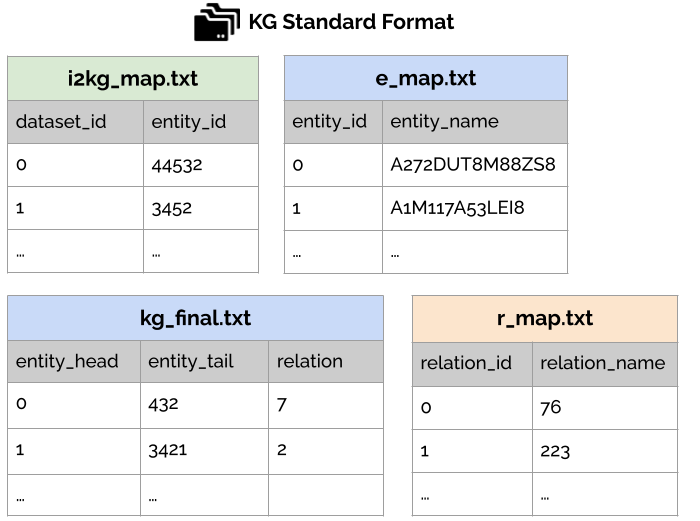

It is crucial to use **our mappers** (we will see them in part 2) and **convert the KG** to a version **readable by different models**.

Let's **save** our preprocessed KG in the **standard format** into `data/ml1m/preprocessed/kg`.

In [ ]:
ml1m_kg_preprocessed_path = 'data/ml1m/preprocessed/'

Let's save the preprocessed relations in a new `r_map.txt` file.

In [ ]:
display(relations_df)
relations_df.to_csv(f'{ml1m_kg_preprocessed_path}/r_map.txt', header=["relation_id", "relation_url"], index=False, sep='\t', mode='w+')

,relation_id,relation_url
0,0,http://dbpedia.org/ontology/cinematography
1,1,http://dbpedia.org/property/productionCompanies
2,2,http://dbpedia.org/property/composer
3,3,http://purl.org/dc/terms/subject
10,10,http://dbpedia.org/ontology/starring
11,11,http://dbpedia.org/ontology/country
12,12,http://dbpedia.org/ontology/wikiPageWikiLink
14,14,http://dbpedia.org/ontology/editing
15,15,http://dbpedia.org/property/producers
16,16,http://dbpedia.org/property/allWriting


Let's do the same for the `e_map.txt` file.

In [ ]:
display(entities_df.head(5))
entities_df.to_csv(f'{ml1m_kg_preprocessed_path}/e_map.txt', header=["entity_id", "entity_url"], index=False, sep='\t', mode='w+')

,entity_id,entity_url
0,0,http://dbpedia.org/resource/Roger_Carel
1,1,http://dbpedia.org/resource/Soundtrack_album
2,2,http://dbpedia.org/resource/1982_in_film
3,3,http://dbpedia.org/resource/Category:Films_set...
4,4,http://dbpedia.org/resource/Plaza_Hotel


Save the `i2kg_map.txt`.

In [ ]:
display(movies_to_kg_df.head(5))
movies_to_kg_df.to_csv(f'{ml1m_kg_preprocessed_path}/i2kg_map.txt', header=["dataset_id", "movie_name", 'entity_url', 'entity_id'], index=False, sep='\t', mode='w+')

,dataset_id,movie_name,entity_url,entity_id
0,781,Stealing Beauty (1996),http://dbpedia.org/resource/Stealing_Beauty,5474
1,1799,Suicide Kings (1997),http://dbpedia.org/resource/Suicide_Kings,9337
2,521,Romeo Is Bleeding (1993),http://dbpedia.org/resource/Romeo_Is_Bleeding,8520
3,3596,Screwed (2000),http://dbpedia.org/resource/Screwed_(2000_film),4713
4,3682,Magnum Force (1973),http://dbpedia.org/resource/Magnum_Force,14676


And finally `kg_final.txt`.

In [ ]:
display(kg_df.head(5))
kg_df.to_csv(f'{ml1m_kg_preprocessed_path}/kg_final.txt', header=["entity_head", "entity_tail", 'relation'], index=False, sep='\t', mode='w+')

,entity_head,entity_tail,relation
0,9386,4955,12
1,6851,1770,1
3,4205,406,12
4,11533,12345,3
5,2075,7182,12


✅ We are done with Part 1 for this dataset!

<a name="3"></a>
## 3 - Last.FM 1M

---

<a name="3.1"></a>
### 3.1 Dataset

This dataset is located under `data/lfm1m`. The dataset has been obtained as a randomly extracted subset of users and songs constrained to have a size of 1M from the original [Last.FM 1 Billion dataset](http://www.cp.jku.at/datasets/LFM-1b/) [[2]](#p2).

#### Dataset Description

The dataset is composed by the following files:

- 👥 `data/lfm1m/users.dat`: List of users and some demographical data.

- 📀 `data/lfm1m/movies.dat`: Products catalog of songs and associated artists.

- ⭐ `data/lfm1m/ratings.dat`: List of users' positive interactions with songs.

The files are composed by rows **separated by** `\t` that contain crucial and side-information for the recommendation task. 

The rows are structured as follow:

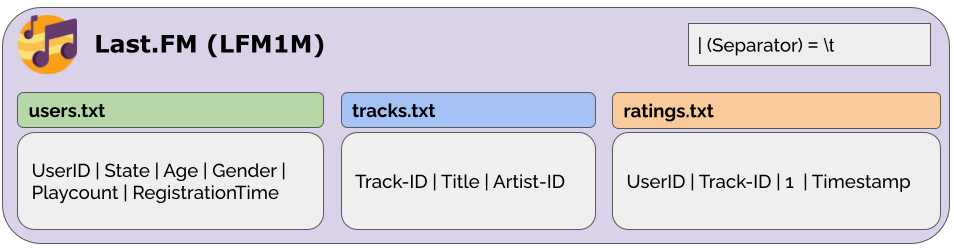

Last.FM 1M is a reduced version of the Last.FM 1B dataset. It has been obtained reducing the original dataset to its k-core with k=10. 

> *A dataset reduced to its K-cores (i.e., dense subsets) is a subset with removed items and users, such that each of the remaining users and items have k reviews each.*

The **original dataset** can be used to perform different tasks, such as album recommendation, artist recommendation, and track recommendation. 

For the purpose of this tutorial, we will focus on the **track recommendation task**.

The dataset has been already reduced to its 10-core and trasformed to the standardize format.

So everything is already done! 
We will just load the data, visualize it's content, and print some stats.

#### Load and visualize

Before starting, let's save a variable with the path to the `data/lfm1m/`; in this way, we can avoid repeating code.

In [ ]:
lfm1m_path = 'data/lfm1m'

Let's load into a dataframe the users and visualize them.

In [ ]:
lastfm_users_df = pd.read_csv(f"{lfm1m_path}/users.txt", sep="\t", names=["user-id", "country", "age", "gender", "playcount", "registered_timestamp"])
display(lastfm_users_df.head(5))
print(f"Number of users: {lastfm_users_df.shape[0]}")

Doing the same for the tracks.

In [ ]:
lastfm_songs_df = pd.read_csv(f"{lfm1m_path}/tracks.txt", sep="\t", names=["track-id", "track-name", "artist-id"])
display(lastfm_songs_df.head(5))
print(f"Number of tracks: {lastfm_songs_df.shape[0]}")

And the ratings. Differently from ML1M, you can see that these ratings are expressed as **implicit feedback**.

In [ ]:
lastfm_ratings_df = pd.read_csv(f"{lfm1m_path}/ratings.txt", sep="\t")
display(lastfm_ratings_df.head(5))
print(f"Number of ratings: {lastfm_songs_df.shape[0]}")

<a name="3.2"></a>
### 3.2 Knowledge Graph (KG)


This KG is located under `data/lfm1m/kg`. It was extracted from Freebase [[10]](#p10) and created by Zhao et. al. [[11]](#p11) from their proposed [KG extractor method](https://github.com/RUCDM/KB4Rec). We produced a subset according to the items present in the LFM1M dataset. 

#### KG description

The Freebase KG is composed of 4 main files:

- `i2kg_map.tsv`: Mapping between the Last.FM dataset and the corresponding entity in the KG. 

- `e_map.txt`: Set of entities.

- `r_map.txt`: Set of relations.

- `kg.txt`: Set of triplets *(entity_head, relation, entity_tail)*.

The files, internally, are structured as follows:

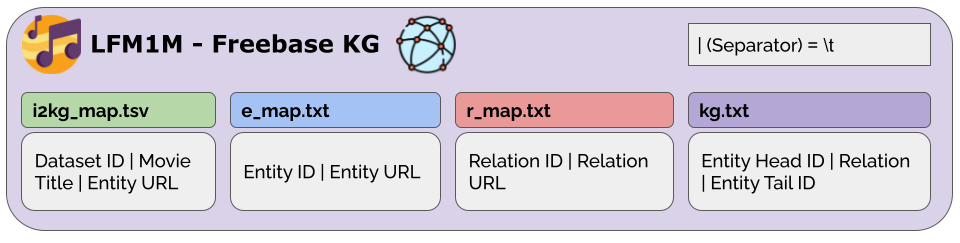

#### Freebase KG

**Every item in this subset is linked to the correspondent entity** in the KG. Consequently, we don't have to perform additional preprocessing. For LFM1M, we only to show the KG stats.

First `i2kg_map.tsv`.

In [ ]:
songs_to_kg_df = pd.read_csv(f"{lfm1m_path}/kg/i2kg_map.tsv", sep="\t", names=["track-id", "entity_id"])
display(songs_to_kg_df.head(5))
print(f"Number of songs mapped to KG: {songs_to_kg_df.shape[0]}")

Then `e_map.txt`.

In [ ]:
entities_df = pd.read_csv(f"{lfm1m_path}/kg/e_map.txt", sep="\t")
display(entities_df.head(5))
print(f"Number of entities in the KG: {entities_df.shape[0]}")

The KG triplets `kg.txt`.

In [ ]:
kg_df = pd.read_csv(f"{lfm1m_path}/kg/kg.txt", sep="\t")
display(kg_df.head(5))
print(f"Number of triplets in the KG: {kg_df.shape[0]}")

And the relations `r_map.txt`.

In [ ]:
relations_df = pd.read_csv(f"{lfm1m_path}/kg/r_map.txt", sep="\t")
relations_df

<a name="3.3"></a>
### 3.3 Preprocessing Dataset

#### Missing Items in the KG

Let's check if we have **missing items** between the original dataset and the KG.

In [ ]:
print(f"Items in the original dataset: {lastfm_songs_df.shape[0]}")
print(f"Items correctly mapped in the KG: {songs_to_kg_df.shape[0]}")

✅ Great, no missing items, we can avoid this preprocessing.




#### Reducing a dataset to its k-core (Threshold Discarding)

As done before we create the counts column.

In [ ]:
counts_col_user = lastfm_ratings_df.groupby("user_id")["user_id"].transform(len)
counts_col_songs = lastfm_ratings_df.groupby("track_id")["track_id"].transform(len)
counts_col_user.head(5)

In [ ]:
k_user, k_song = 5, 5
mask_user = counts_col_user >= k_user
mask_movies = counts_col_songs >= k_movie
mask_user.head(5)

In [ ]:
print(f"Number of ratings before: {lastfm_ratings_df.shape[0]}")
lastfm_ratings_df = lastfm_ratings_df[mask_user & mask_movies]
print(f"Number of ratings after: {lastfm_ratings_df.shape[0]}")
lastfm_ratings_df.head(5)

✅ Great, no removed users or items! We are done!

<a name="3.4"></a>
### 3.4 Saving dataset to standard format

As we have done before let's save the LFM1M dataset in **standard format**. First `users.txt`:

In [ ]:
lastfm_users_df = lastfm_users_df.drop(["country", "age", "gender", "playcount", "registered_timestamp"], axis=1)
lastfm_users_df.insert(0, 'new_id', range(lastfm_users_df.shape[0])) #Create a new incremental ID

In [ ]:
lastfm_users_df.to_csv(f'{lfm1m_path}/preprocessed/users.txt', header=["new_id", "raw_dataset_id"], index=False, sep='\t', mode='w+')
display(lastfm_users_df.head(5))
print(f"Number of users: {lastfm_users_df.shape[0]}")

In [ ]:
user_id2new_id = dict(zip(lastfm_users_df["user-id"], lastfm_users_df["new_id"]))

Then `products.txt`:

In [ ]:
lastfm_songs_df = lastfm_songs_df.drop(["track-name", "artist-id"], axis=1)
lastfm_songs_df.insert(0, 'new_id', range(lastfm_songs_df.shape[0])) #Create a new incremental ID

In [ ]:
lastfm_songs_df.to_csv(f'{lfm1m_path}/preprocessed/products.txt', header=["new_id", "raw_dataset_id"], index=False, sep='\t', mode='w+')
display(lastfm_songs_df.head(5))
print(f"Number of tracks: {lastfm_songs_df.shape[0]}")

In [ ]:
song_id2new_id = dict(zip(lastfm_songs_df["track-id"], lastfm_songs_df['new_id']))

Convert the ids in the `lastfm_ratings_df`.

In [ ]:
lastfm_ratings_df["user_id"] = lastfm_ratings_df['user_id'].map(user_id2new_id)
lastfm_ratings_df["track_id"] = lastfm_ratings_df['track_id'].map(song_id2new_id)
lastfm_ratings_df.head(5)

And finally save the `ratings.txt`.

In [ ]:
#Save ratings, which are already in the standard format
lastfm_ratings_df.to_csv(f'{lfm1m_path}/preprocessed/ratings.txt', header=["uid", "pid", "rating", "timestamp"], index=False, sep='\t', mode='w+')

<a name="3.5"></a>
### 3.5 Preprocessing the KG

#### Cleaning wrong formated triplets

In [ ]:
display(songs_to_kg_df.head(5))
print(f"Number of songs correctly mapped: {songs_to_kg_df.shape[0]}")

Also for LastFM, let's swap the triplets that are formatted as **entity_head (external entity)**, **entity_tail (item)**, **relation**.

In [ ]:
mask = kg_df['entity_tail'].isin(songs_to_kg_df.entity_id) \
        & ~kg_df['entity_head'].isin(songs_to_kg_df.entity_id)
kg_df.loc[mask, ['entity_head', 'entity_tail']] = \
    (kg_df.loc[mask, ['entity_tail', 'entity_head']].values)

Now, let's remove the invalid **product to product** or **entity to entity** relations 

In [ ]:
n_of_triplets = kg_df.shape[0]
kg_df = kg_df[(kg_df['entity_head'].isin(songs_to_kg_df.entity_id) & ~kg_df['entity_tail'].isin(songs_to_kg_df.entity_id))]
display(kg_df.head(5))
print(f"Number of triplets before: {n_of_triplets}")
print(f"Number of triplets after: {kg_df.shape[0]}")

✅ All triplets are already valid, we **don't need to proceed further**.

#### Selecting relations

Similar to what we have done reducing the dataset to its **k-core** for ML1M in [Section 2.3](#2.3), we can make the **KG more dense by discarding relations or entities** that appear less than *k* times. In this case, since we have already a reduced the number of triplets, let's discard relations that appear **less that 100 times** in our triplets! 

In [ ]:
len(kg_df['relation'].unique())

In [ ]:
v = kg_df[['relation']]
n_of_triplets = kg_df.shape[0]
kg_df = kg_df[v.replace(v.apply(pd.Series.value_counts)).gt(100).all(1)]
display(kg_df.head(5))
print(f"Number of triplets before: {n_of_triplets}")
print(f"Number of triplets after: {kg_df.shape[0]}")

✅ Great, no relation discarded, we are done.

<a name="3.6"></a>
### 3.6 Saving preproccesed KG in Standard Format

Recall, from **Section 1.2**, that we want **all the datasets** to be formatted **in the same structure**. 

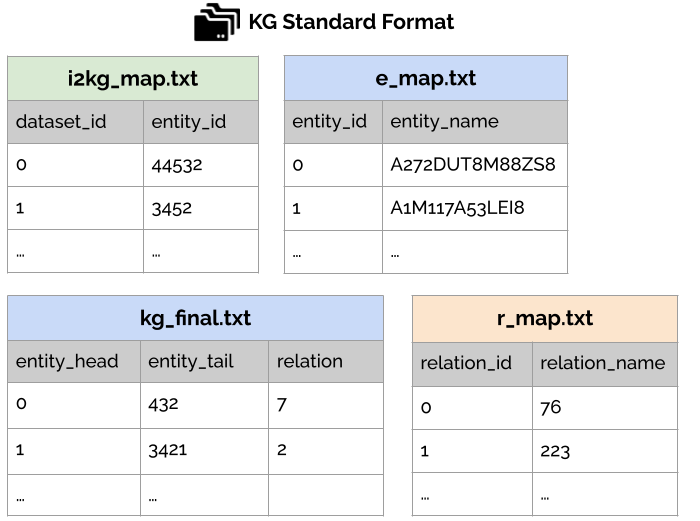

It is crucial to use **our mappers (Part 2)** and **convert the KG** to a version **readable by different models**.

Let's **save** our preprocessed KG in the **standard format** into `data/ml1m/preprocessed/kg`.

In [ ]:
lfm1m_kg_preprocessed_path = 'data/lfm1m/preprocessed/'

Let's save the preprocessed relations.

In [ ]:
display(relations_df)
relations_df.to_csv(f'{lfm1m_kg_preprocessed_path}/r_map.txt', header=["relation_id", "relation_url"],
                    index=False, sep='\t', mode='w+')

Let's do the same for the `e_map.txt` file.

In [ ]:
display(entities_df.head(5))
entities_df.to_csv(f'{lfm1m_kg_preprocessed_path}/e_map.txt', header=["entity_id", "entity_url"],
                   index=False, sep='\t', mode='w+')

`i2kg.txt` file:

In [ ]:
display(songs_to_kg_df.head(5))
songs_to_kg_df.to_csv(f'{lfm1m_kg_preprocessed_path}/i2kg_map.txt', header=["dataset_id", 'entity_id'],
                      index=False, sep='\t', mode='w+')

And `kg_final.txt` file, making sure to reordering the columns before

In [ ]:
cols = ["entity_head", "entity_tail", "relation"]
kg_df = kg_df[cols]
display(kg_df.head(5))
kg_df.to_csv(f'{lfm1m_kg_preprocessed_path}/kg_final.txt', header=["entity_head", "entity_tail", 'relation'],
             index=False, sep='\t', mode='w+')

✅ We are done with Part 1 for this dataset!

<a name="4"></a>
## 4 - Amazon CellPhones

---

This is the **5-core dense subset** downloaded from the original [Amazon Review Data Collections (2018)](https://nijianmo.github.io/amazon/index.html) [] , which can be downloaded [here](http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz).

This version has been reduced to extract the **k-core** (Covered in 2.2), in this case 5-core.

Let's read the dataset using `pandas.read_json()` function.

<a name="4.1"></a>
### 4.1 - Dataset

#### Dataset description

The dataset is composed by a single file:

- 📦 `data/cellphones/Cell_Phones_and_Accessories_5.json`: List of users product interactions expressed with a rating between 0-5 and a textual review. It contains a lot of metadata about the interaction.

The file is a `.json` file structured as follow:

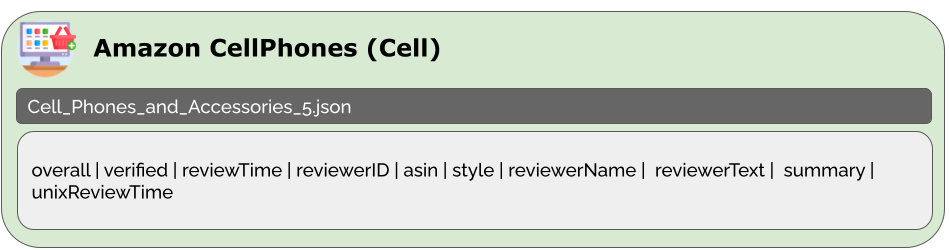

#### Load and visualize

In [ ]:
cell_path = 'data/cellphones'

To reduce the size of the file, this dataset has been kept to the `.gz` compression format. In order to read a compressed `json`, we will use one function contained in our `utils.py` functions set. Let's import all the functions from `utils`.

In [ ]:
from utils import *

Now, we use the function `getDF(filename)` to load the dataframe.

⏱️ Approximately: 32 seconds.

In [ ]:
cell_df = getDF(f"{cell_path}/Cell_Phones_and_Accessories_5.json.gz")

We can now take a look to the dataset and check its properties.

In [ ]:
display(cell_df.head(5))
print(f"Number of unique users: {cell_df.reviewerID.unique().shape[0]}")
print(f"Number of unique products: {cell_df.asin.unique().shape[0]}")
print(f"Number of interactions: {cell_df.shape[0]}")

Since for Cellphones we have to create the KG from the product metadata, **we need to proprocess the dataset first** and then to create the KG.

<a name="4.2"></a>
### 4.2 - Preprocessing Dataset

#### Removing unuseful attributes

As a first preprocessing step, we will **remove the ratings** produced by users that are **not verified**. This will make our data cleaner and increase the chance we are not considering **fake reviews**.

In [ ]:
n_of_interactions = cell_df.shape[0]
cell_df = cell_df[cell_df.verified == True]
print(f"Number of interactions before: {n_of_interactions}")
print(f"Number of interactions (removing the ones done by unverified users): {n_of_interactions - cell_df.shape[0]}")

Let's perform more cleaning. We can see all the **columns of the dataframe** by accessing the attribute columns, with `DataFrame.columns`. 

In [ ]:
cell_df.columns

We are not going to use all this data. So **let's remove some columns** that are not useful for our purposes. In particular, we would like to discard the `['verified', 'reviewTime', 'style', 'reviewerName', 'reviewText', 'summary', 'vote', 'image' columns]`.

In [ ]:
cell_df = cell_df.drop(['verified', 'reviewTime', 'style', 'reviewerName', 'reviewText', 'summary', 'vote', 'image'], axis=1)

In [ ]:
print(f"Unique interactions: {cell_df.shape[0]}")
cell_df.head(5)

Much better now!🤗


#### Reducing to k-core (Threshold Discarding)

Again, we are going to perform a **threshold discarding**, using this time `k=10` for users and products.

In [ ]:
print(f"Users before: {cell_df.reviewerID.unique().shape[0]}")
print(f"Products before: {cell_df.asin.unique().shape[0]}")
print(f"Number of interaction before: {cell_df.shape[0]}")
k_user, k_product = 10, 10
counts_col_products = cell_df.groupby("asin")["asin"].transform(len)
counts_col_users = cell_df.groupby("reviewerID")["reviewerID"].transform(len)

mask = (counts_col_products >= k_product) & (counts_col_users >= k_user)

cell_df = cell_df[mask]

print(f"Users after: {cell_df.reviewerID.unique().shape[0]}")
print(f"Products after: {cell_df.asin.unique().shape[0]}")
print(f"Number of interaction after: {cell_df.shape[0]}")

<a name="4.3"></a>
### 4.3 - Save dataset to standard format

In [ ]:
cell_path_preprocessed = "data/cellphones/preprocessed"

Let's proceed **as seen before**. The only thing that we need to consider here is that since we are extracting the data from the ratings, we need to remove the duplicates. Let's start first with `users.txt`:

In [ ]:
cell_users = pd.DataFrame(cell_df.reviewerID.unique(), columns=["reviewerID"])
cell_users.insert(0, 'new_id', range(cell_users.shape[0])) #Create a new incremental ID
display(cell_users.head(5))
print(f"Number of users: {cell_users.shape[0]}")

In [ ]:
cell_users.to_csv(f"{cell_path_preprocessed}/users.txt", header=["new_id", "raw_dataset_id"], index=False, sep='\t', mode='w+')

In [ ]:
user_id2new_id = dict(zip(cell_users.reviewerID, cell_users.new_id))

Then `products.txt`

In [ ]:
cell_products = pd.DataFrame(cell_df.asin.unique(), columns=["asin"])
cell_products.insert(0, 'new_id', range(cell_products.shape[0])) #Create a new incremental ID
display(cell_products.head(5))
print(f"Number of products: {cell_products.shape[0]}")

In [ ]:
# Save products in standard format
cell_products.to_csv(f"{cell_path_preprocessed}/products.txt", header=["new_id", "raw_dataset_id"], index=False, sep='\t', mode='w+')

In [ ]:
product_id2new_id = dict(zip(cell_products.asin, cell_products.new_id))

Update both `reviewerID` and `asin` with their `new_id` before writting the `ratings.txt` file.

In [ ]:
cell_df["asin"] = cell_df['asin'].map(product_id2new_id)
cell_df["reviewerID"] = cell_df['reviewerID'].map(user_id2new_id)
display(cell_df.head(5))
print(f"Number of ratings: {cell_df.shape[0]}")

Mapping completed!🤗
We can write our `ratings.txt` file, after reordering the columns.

In [ ]:
#Save ratings, which are already in the standard format
cols = ["reviewerID", "asin", "overall", "unixReviewTime"]
cell_df = cell_df[cols]
cell_df.to_csv(f"{cell_path_preprocessed}/ratings.txt", header=["uid", "pid", "rating", "timestamp"], index=False, sep='\t', mode='w+')

<a name="4.4"></a>

### 4.4 - Knowledge Graph (KG)

As anticipated before, differently from the other datasets, the Amazon Cellphones KG **is created using the products metadata** instead of linking the products with a KB.

It has been created using the metadatas of the products by Zhang et al. [12].

#### KG description

The Amazon Cellphone KG can be composed by a single file:

- `meta_Cell_Phones_and_Accessories.json.gz`: Contains the products metadata like *category*, *bought together*, *see also*, *brand*, etc.

Due to the amount of data, it's difficult to produce a good representation, so we are **going to directly load and visualize it**.

#### Costructing the KG from the metadata

Let's first visualize `meta_Cell_Phones_and_Accessories.json.gz`.

⏱️ Approximately: 1 minutes.

In [ ]:
metaproduct_df = getDF(f'{cell_path}/kg/meta_Cell_Phones_and_Accessories.json.gz')

**To construct the KG**, we will leverage the `create_kg_from_metadata(dataset)` function from the `knowledge_graph_utils` package created for this tutorial. 

*Note: This function produces a KG already in standard format.*

In [ ]:
from knowledge_graph_utils import create_kg_from_metadata

Requires the `products.txt` in the standard formats. 

This function will create the following 4 files:

- `i2kg_map.tsv`: Mapping between the Last.FM dataset and the correspondend entity in the KG. 

- `e_map.txt`: Set of entities.

- `r_map.txt`: Set of relations.

- `kg.txt`: Set of triplets *(entity_head, relation, entity_tail)*.

Into the `data/cellphones/kg` folder.

⏱️ Approximately: 1.2 minutes.

In [ ]:
create_kg_from_metadata("cellphones")

In [ ]:
!ls data/cellphones/preprocessed

Let's load and visualize the produced files. 

In [ ]:
products_to_kg_df = pd.read_csv(f"{cell_path_preprocessed}/i2kg_map.txt", sep="\t")
display(products_to_kg_df.head(5))
print(f"Number of products mapped to the kg: {products_to_kg_df.shape[0]}")

In [ ]:
entities_df = pd.read_csv(f"{cell_path_preprocessed}/e_map.txt", sep="\t")
display(entities_df.head(5))
print(f"Number of entities in the KG: {entities_df.shape[0]}")

In [ ]:
kg_df = pd.read_csv(f"{cell_path_preprocessed}/kg_final.txt", sep="\t")
display(kg_df.head(5))
print(f"Number of triplets: {kg_df.shape[0]}")

In [ ]:
kg_relations_df = pd.read_csv(f"{cell_path_preprocessed}/r_map.txt", sep="\t")
kg_relations_df

For the KG, we don't need futher preprocessing, since we want to use all the relations created by `create_kg_from_metadata(dataset)` and the **triplets are garanteed to be well-formatted**.

The only thing left to do is to **update the KG**, **according to** the **products** that we have **removed** during the **dataset preprocessing**.

✅ We are done with Part 1 for this dataset!

<a name="5"></a>
# References

<a name="p1">[1]</a> F. Maxwell Harper, Joseph A. Konstan:
The MovieLens Datasets: History and Context. ACM Trans. Interact. Intell. Syst. 5(4): 19:1-19:19 (2016)

<a name="p2">[2]</a> Markus Schedl: The LFM-1b Dataset for Music Retrieval and Recommendation. ICMR 2016: 103-110

<a name="p3">[3]</a> F. Maxwell Harper, Joseph A. Konstan:
The MovieLens Datasets: History and Context. ACM Trans. Interact. Intell. Syst. 5(4): 19:1-19:19 (2016)

<a name="p4">[4]</a> Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, Zachary G. Ives:
DBpedia: A Nucleus for a Web of Open Data. ISWC/ASWC 2007: 722-735

<a name="p5">[5]</a> Denny Vrandecic, Markus Krötzsch:
Wikidata: a free collaborative knowledgebase. Commun. ACM 57(10): 78-85 (2014)

<a name="p6">[6]</a> Yixin Cao, Xiang Wang, Xiangnan He, Zikun Hu, Tat-Seng Chua:
Unifying Knowledge Graph Learning and Recommendation: Towards a Better Understanding of User Preferences. WWW 2019: 151-161

<a name="p7">[7]</a> Fuzheng Zhang, Nicholas Jing Yuan, Defu Lian, Xing Xie, Wei-Ying Ma:
Collaborative Knowledge Base Embedding for Recommender Systems. KDD 2016: 353-362

<a name="p8">[8]</a> Qingyao Ai, Vahid Azizi, Xu Chen, Yongfeng Zhang:
Learning Heterogeneous Knowledge Base Embeddings for Explainable Recommendation. Algorithms 11(9): 137 (2018)

<a name="p9">[9]</a> Xiang Wang, Xiangnan He, Yixin Cao, Meng Liu, Tat-Seng Chua:
KGAT: Knowledge Graph Attention Network for Recommendation. KDD 2019: 950-958

<a name="p10">[10]</a> Kurt D. Bollacker, Colin Evans, Praveen K. Paritosh, Tim Sturge, Jamie Taylor:
Freebase: a collaboratively created graph database for structuring human knowledge. SIGMOD Conference 2008: 1247-1250

<a name="p11">[11]</a> Wayne Xin Zhao, Gaole He, Kunlin Yang, Hongjian Dou, Jin Huang, Siqi Ouyang, Ji-Rong Wen:
KB4Rec: A Data Set for Linking Knowledge Bases with Recommender Systems. Data Intell. 1(2): 121-136 (2019)

<a name="p12">[12]</a> Yongfeng Zhang, Qingyao Ai, Xu Chen, W. Bruce Croft:
Joint Representation Learning for Top-N Recommendation with Heterogeneous Information Sources. CIKM 2017: 1449-1458

<a name="p13">[13]</a> Yikun Xian, Zuohui Fu, S. Muthukrishnan, Gerard de Melo, Yongfeng Zhang:
Reinforcement Knowledge Graph Reasoning for Explainable Recommendation. SIGIR 2019: 285-294

<a name="p14">[14]</a> Antoine Bordes, Nicolas Usunier, Alberto García-Durán, Jason Weston, Oksana Yakhnenko:
Translating Embeddings for Modeling Multi-relational Data. NIPS 2013: 2787-2795

<a name="p15">[15]</a> Yikun Xian, Zuohui Fu, Handong Zhao, Yingqiang Ge, Xu Chen, Qiaoying Huang, Shijie Geng, Zhou Qin, Gerard de Melo, S. Muthukrishnan, Yongfeng Zhang:
CAFE: Coarse-to-Fine Neural Symbolic Reasoning for Explainable Recommendation. CIKM 2020: 1645-1654

<a name="p16">[16]</a> Zhu Sun, Jie Yang, Jie Zhang, Alessandro Bozzon, Long-Kai Huang, Chi Xu:
Recurrent knowledge graph embedding for effective recommendation. RecSys 2018: 297-305

<a name="p17">[17]</a> Hongwei Wang, Fuzheng Zhang, Miao Zhao, Wenjie Li, Xing Xie, Minyi Guo:
Multi-Task Feature Learning for Knowledge Graph Enhanced Recommendation. CoRR abs/1901.08907 (2019)

<a name="p18">[18]</a> Xiang Wang, Tinglin Huang, Dingxian Wang, Yancheng Yuan, Zhenguang Liu, Xiangnan He, Tat-Seng Chua:
Learning Intents behind Interactions with Knowledge Graph for Recommendation. WWW 2021: 878-887

<a name="p19">[19]</a> Song, Weiping, Zhijian Duan, Ziqing Yang, Hao Zhu, Ming Zhang, and Jian Tang. "Explainable knowledge graph-based recommendation via deep reinforcement learning." arXiv preprint arXiv:1906.09506 (2019).

<a name="p20">[20]</a>	Hongwei Wang, Fuzheng Zhang, Jialin Wang, Miao Zhao, Wenjie Li, Xing Xie, Minyi Guo:
RippleNet: Propagating User Preferences on the Knowledge Graph for Recommender Systems. CIKM 2018: 417-426

<a name="p21">[21]</a> Xiang Wang, Dingxian Wang, Canran Xu, Xiangnan He, Yixin Cao, Tat-Seng Chua:
Explainable Reasoning over Knowledge Graphs for Recommendation. AAAI 2019: 5329-5336

<a name="p22">[22]</a> Binbin Hu, Chuan Shi, Wayne Xin Zhao, Philip S. Yu: Leveraging Meta-path based Context for Top- N Recommendation with A Neural Co-Attention Model. KDD 2018: 1531-1540

<a name="p23">[23]</a>
Chuan Shi, Binbin Hu, Wayne Xin Zhao, Philip S. Yu:
Heterogeneous Information Network Embedding for Recommendation. CoRR abs/1711.10730 (2017)

<a name="p24">[24]</a> Xiaowen Huang, Quan Fang, Shengsheng Qian, Jitao Sang, Yan Li, Changsheng Xu:
Explainable Interaction-driven User Modeling over Knowledge Graph for Sequential Recommendation. ACM Multimedia 2019: 548-556

<a name="p25">[25]</a> Song, Weiping, et al. "Explainable knowledge graph-based recommendation via deep reinforcement learning." arXiv preprint arXiv:1906.09506 (2019).

<a name="p26">[26]</a> Chang-You Tai, Liang-Ying Huang, Chien-Kun Huang, Lun-Wei Ku:
User-Centric Path Reasoning towards Explainable Recommendation. SIGIR 2021: 879-889

<a name="p27">[27]</a> Xiting Wang, Kunpeng Liu, Dongjie Wang, Le Wu, Yanjie Fu, Xing Xie:
Multi-level Recommendation Reasoning over Knowledge Graphs with Reinforcement Learning. WWW 2022: 2098-2108

<a name="p28">[28]</a> Danyang Liu, Jianxun Lian, Zheng Liu, Xiting Wang, Guangzhong Sun, Xing Xie:
Reinforced Anchor Knowledge Graph Generation for News Recommendation Reasoning. KDD 2021: 1055-1065

<a name="p29">[29]</a> Zhen Wang, Jianwen Zhang, Jianlin Feng, Zheng Chen:
Knowledge Graph Embedding by Translating on Hyperplanes. AAAI 2014: 1112-

<a name="p30">[30]</a> Zhiqing Sun, Zhi-Hong Deng, Jian-Yun Nie, Jian Tang:
RotatE: Knowledge Graph Embedding by Relational Rotation in Complex Space. ICLR (Poster) 2019

<a name="p31">[31]</a>  Yankai Lin, Zhiyuan Liu, Maosong Sun, Yang Liu, Xuan Zhu:
Learning Entity and Relation Embeddings for Knowledge Graph Completion. AAAI 2015: 2181-2187

<a name="p32">[32]</a>  Tim Dettmers, Pasquale Minervini, Pontus Stenetorp, Sebastian Riedel:
Convolutional 2D Knowledge Graph Embeddings. AAAI 2018: 1811-1818

<a name="p33">[33]</a> Ni Lao, Tom M. Mitchell, William W. Cohen:
Random Walk Inference and Learning in A Large Scale Knowledge Base. EMNLP 2011: 529-539


<a name="p34">[34]</a> Yining Wang, Liwei Wang, Yuanzhi Li, Di He, Tie-Yan Liu:
A Theoretical Analysis of NDCG Type Ranking Measures. COLT 2013: 25-54


<a name="p35">[35]</a> Giacomo Balloccu, Ludovico Boratto, Gianni Fenu, and Mirko Marras. 2022. Post Processing Recommender Systems with Knowledge Graphs for Recency, Popularity, and Diversity of Explanations. In Proceedings of the 45th International ACM SIGIR Conference on Research and Development in Information Retrieval (SIGIR '22). Association for Computing Machinery, New York, NY, USA, 646–656. https://doi.org/10.1145/3477495.3532041

<a name="p36">[36]</a> Giacomo Balloccu, Ludovico Boratto, Gianni Fenu, and Mirko Marras. 2022.
Reinforcement Recommendation Reasoning through Knowledge Graphs for Explanation Path Quality. https://arxiv.org/abs/2209.04954